<a href="https://colab.research.google.com/github/batio3/classification_and_clustering/blob/main/classification_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 80

In [4]:
iris = load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [7]:
data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
data.drop(columns = ['petal length (cm)','petal width (cm)'], inplace = True)
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [9]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.3, random_state=42)

In [11]:
len(y_test)

45

In [12]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
lda = LinearDiscriminantAnalysis()

In [14]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [15]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0,
       0])

In [16]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [17]:
result

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [18]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, lda.predict(X_test))

0.8444444444444444

In [20]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.86740989,  8.53300115],
       [ 1.31353719, -3.78679337],
       [ 3.60240083, -3.36247786]])

In [21]:
# визуализируем дискриминантные линии только по 2 признакам
small_train = X_train[['sepal length (cm)', 'sepal width (cm)']]
small_test = X_test[['sepal length (cm)', 'sepal width (cm)']]

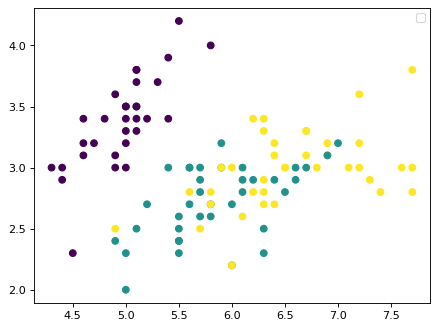

In [22]:
plt.scatter(x=small_train['sepal length (cm)'], y=small_train['sepal width (cm)'], c=y_train)
plt.legend()
plt.show()


In [23]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [24]:
# посмотрим на наши центроиды
lda_small.means_

array([[4.96451613, 3.37741935],
       [5.86216216, 2.72432432],
       [6.55945946, 2.98648649]])

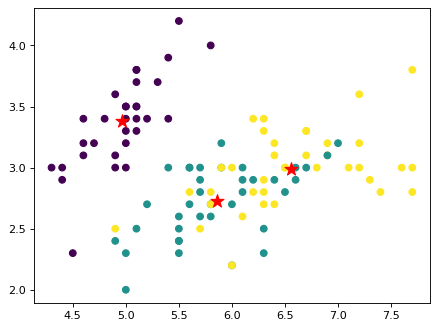

In [25]:
# сам scatter plot
plt.scatter(x=small_train['sepal length (cm)'], y=small_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

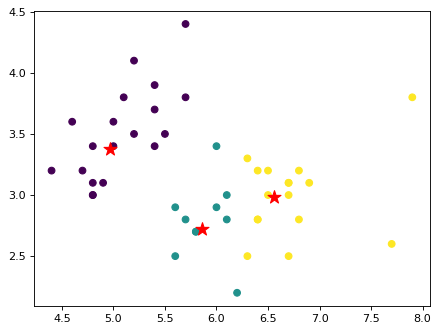

In [26]:
# визуализация разделения на тесте
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=lda_small.predict(small_test))
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

In [27]:
# второй признак важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[-5.86740989,  8.53300115],
       [ 1.31353719, -3.78679337],
       [ 3.60240083, -3.36247786]])

In [28]:
# какая будет точность?
accuracy_score(y_test, lda_small.predict(small_test))

0.8444444444444444

In [29]:
data[['sepal width (cm)', 'sepal length (cm)']].corr()

,sepal width (cm),sepal length (cm)
sepal width (cm),1.00000,-0.11757
sepal length (cm),-0.11757,1.00000


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
lr.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0])

In [34]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(X_test)

array([[2.59480593e-02, 5.34907413e-01, 4.39144528e-01],
       [6.91402094e-01, 1.19075104e-01, 1.89522802e-01],
       [3.21980676e-05, 1.52520439e-01, 8.47447363e-01],
       [4.91018967e-02, 5.25604897e-01, 4.25293207e-01],
       [1.98084546e-03, 3.21420801e-01, 6.76598353e-01],
       [6.67147362e-01, 2.00776467e-01, 1.32076171e-01],
       [1.70995138e-01, 5.63010539e-01, 2.65994323e-01],
       [3.03209737e-03, 2.23953110e-01, 7.73014793e-01],
       [2.84088317e-03, 6.84332636e-01, 3.12826481e-01],
       [5.22188006e-02, 6.37653660e-01, 3.10127539e-01],
       [1.89261101e-02, 2.99806771e-01, 6.81267119e-01],
       [7.95765930e-01, 1.72844614e-01, 3.13894555e-02],
       [6.57528158e-01, 1.85270799e-01, 1.57201043e-01],
       [7.99360997e-01, 1.62560509e-01, 3.80784939e-02],
       [9.52160772e-01, 2.79742214e-02, 1.98650063e-02],
       [5.23053554e-02, 3.20410351e-01, 6.27284294e-01],
       [1.08903783e-02, 3.54841213e-01, 6.34268408e-01],
       [5.26249612e-02, 7.33071

In [35]:
res = lr.predict_proba(X_test)
sum(res[0])

1.0

In [36]:
accuracy_score(y_test, lr.predict(X_test))

0.8222222222222222

In [37]:
lr.coef_

array([[-2.41335851,  2.00395925],
       [ 0.53411373, -1.60201584],
       [ 1.87924479, -0.40194341]])

**Кластеризация**

In [38]:
data.describe()

,sepal length (cm),sepal width (cm)
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [39]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X=data.values[:]
X=np.nan_to_num(X)
Clus_dataSet=StandardScaler().fit_transform(X)

<ipython-input-41-a3a6361253ac>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)


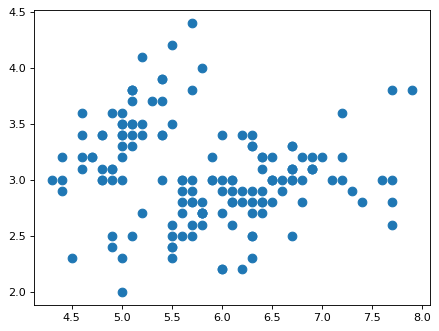

In [41]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [42]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
v_1 = np.array(data[20:])
v_2 = np.array(data[:20])

In [45]:
print(v_1.max())
print(v_1.min())

print(v_2.max())
print(v_2.min())

7.9
2.0
5.8
2.9


In [46]:
v_1_scaled = scaler.fit_transform(v_1.reshape(-1, 1))
v_1_scaled
v_2_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
v_2_scaled

array([[ 0.96015293],
       [-0.8632829 ],
       [ 0.73222345],
       [-1.4331066 ],
       [ 0.50429397],
       [-1.20517712],
       [ 0.39032923],
       [-1.31914186],
       [ 0.84618819],
       [-0.74931816],
       [ 1.30204715],
       [-0.40742394],
       [ 0.39032923],
       [-0.97724764],
       [ 0.84618819],
       [-0.97724764],
       [ 0.16239975],
       [-1.54707133],
       [ 0.73222345],
       [-1.31914186],
       [ 1.30204715],
       [-0.63535342],
       [ 0.61825871],
       [-0.97724764],
       [ 0.61825871],
       [-1.4331066 ],
       [ 0.04843501],
       [-1.4331066 ],
       [ 1.7579061 ],
       [-0.2934592 ],
       [ 1.64394136],
       [ 0.16239975],
       [ 1.30204715],
       [-0.40742394],
       [ 0.96015293],
       [-0.8632829 ],
       [ 1.64394136],
       [-0.52138868],
       [ 0.96015293],
       [-0.52138868]])

In [47]:
print(v_1_scaled.max())
print(v_1_scaled.min())

print(v_2_scaled.max())
print(v_2_scaled.min())

2.114597282588175
-1.5333921815259266
1.7579061022952427
-1.5470713347590233


In [48]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

<ipython-input-49-da53f1562096>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=80)


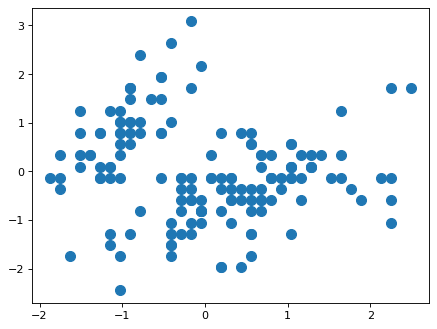

In [49]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=80)

In [50]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

In [51]:
# Описываем модель. Поскольку нам известно, что в нашем наборе данных есть 3 класса, установим параметр модели n_clusters равный трем.
model = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = model.fit_predict(X_scaled)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

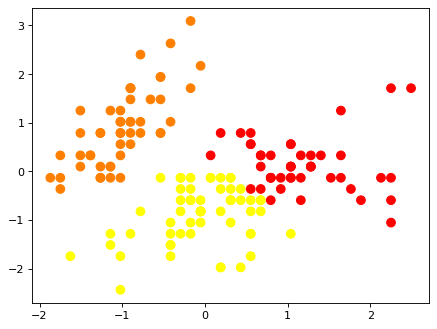

In [52]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [53]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Инерция')

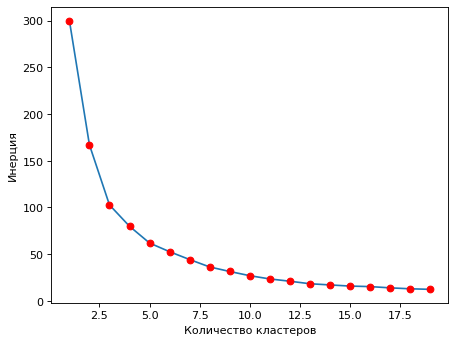

In [54]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')

In [55]:
#Иерархическая кластеризация
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

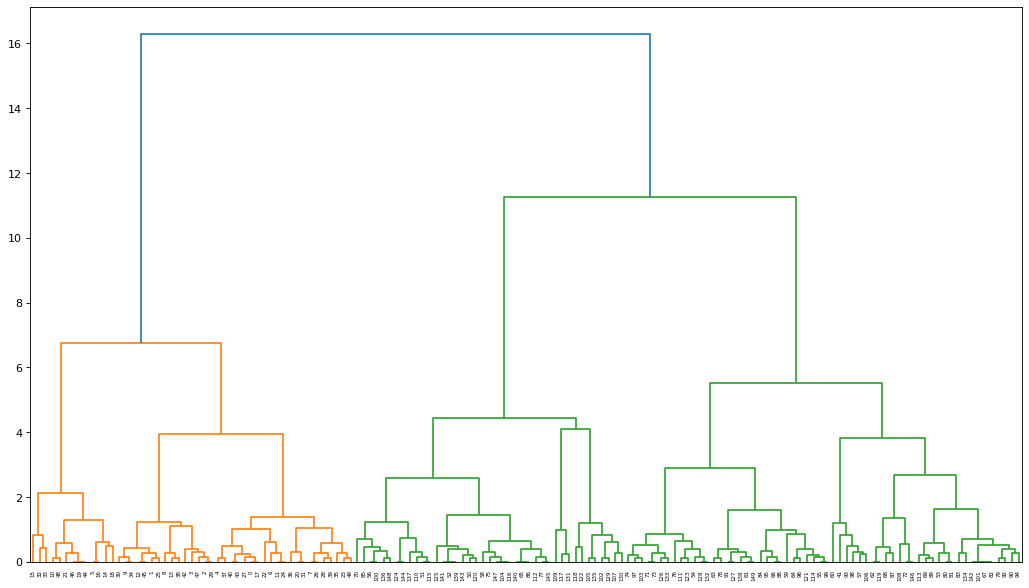

In [56]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
#Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(16, 9))
dn = hierarchy.dendrogram(Z)

In [57]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [58]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

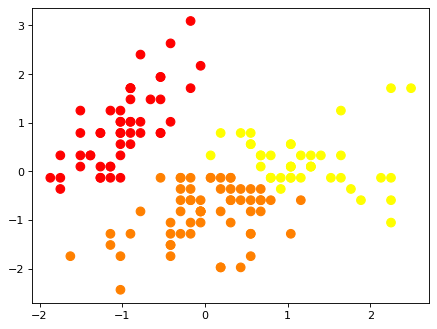

In [59]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [60]:
df = pd.DataFrame(X)
df['Class'] = clusters
df

,0,1,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,1
147,6.5,3.0,2
148,6.2,3.4,2
